In [3]:
#1.a
import pandas as pd
data = [1,2,3,4]
lables = ['a','b','c','d']
s = pd.Series(data, lables)
print(s)

s = pd.Series(data, index=['i','ii','iii','iv'])
print(s)

a    1
b    2
c    3
d    4
dtype: int64
i      1
ii     2
iii    3
iv     4
dtype: int64


In [5]:
#1.b
data = {
    'a' : 10,
    'b' : 20,
    'c' : 30,
}
s = pd.Series(data)
s

data = {
    'Name1' : 'Alice',
    'Name2' : 'Bob',
    'Name3' : 'Charlie',
}
s = pd.Series(data)
s

Name1      Alice
Name2        Bob
Name3    Charlie
dtype: object

In [17]:
D = {
    'Roll No' : [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Address' : ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1'],
    'Marks' : [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
}
df = pd.DataFrame(D)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Roll No  10 non-null     int64 
 1   Name     10 non-null     object
 2   Address  10 non-null     object
 3   Marks    10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


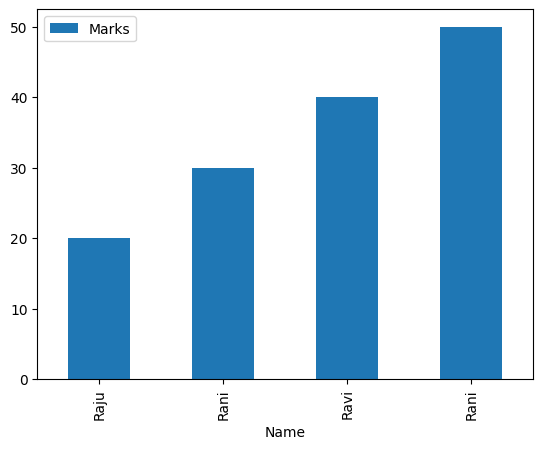

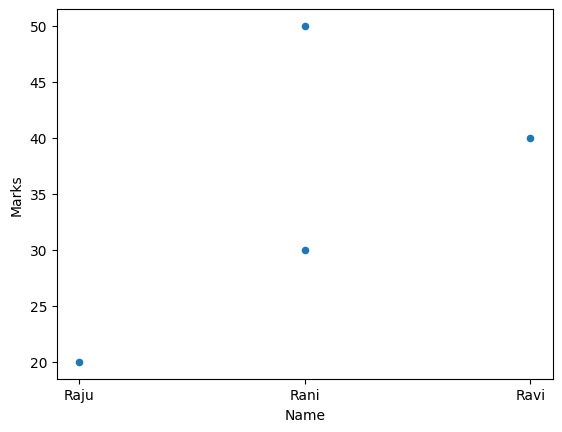

In [29]:
import matplotlib.pyplot as plt
my_dict = {
    'Name' : ['Raju', 'Rani', 'Ravi', 'Rani'],
    'Marks': [20, 30, 40, 50]
}
df = pd.DataFrame(my_dict)
df.plot.bar(x='Name', y='Marks')
df.plot(kind='scatter', x='Name', y='Marks')
plt.show()

In [30]:
graph = {
    'A' : ['B', 'C', 'D'],
    'B' : ['A', 'E', 'C'],
    'C' : ['B', 'E', 'G'],
    'D' : ['A', 'E'],
    'E' : ['A', 'D', 'B', 'F'],
    'F' : ['E', 'G'],
    'G' : []
}
visited = []
queue = []
def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    while queue:
        m = queue.pop(0)
        print(m, end=" ")
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
bfs(visited, graph, 'A')

A B C D E G F 

In [ ]:
import pandas as pd
import heapq

def bestfs(graph, huristic, goal, start):
    visited = set()
    pq = []
    heapq.heappush(pq,(huristic[start], start))
    
    while pq:
        _, current = heapq.heappop(pq)
        print(current, end = "->")
        if current == goal:
            return f"Goal reached: {goal}"
        if current in visited:
            continue
        visited.add(current)

        for neighbour in graph[current]:
            if neighbour not in visited:
                heapq.heappush(pq,(huristic[neighbour], neighbour))

    return "Goal not reachable"

graph ={
    's' : ['a', 'b', 'c'],
    'b' : ['d','h'],
    'h' : ['g'],
    'g' : ['e']
}
huristic = {
    's' : 10, 'a' : 9, 'b' : 7, 'c' : 8, 'd' : 8, 'h': 6, 'f' : 5,'g':3, 'e' : 0
}
start = 's'
goal = 'e'
print(bestfs(graph, huristic, goal, start)) 


s->b->h->g->e->Goal reached: e


In [42]:
graph = {
    'A' : ['B','D','E'],
    'B' : ['A','E','C'],
    'C' : ['B','E','G'],
    'D' : ['A','E'],
    'E' : ['A','D','B','F'],
    'F' : ['E','G'],
    'G' : []

}
visited = set()
def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

dfs(visited, graph, 'A')

A
B
E
D
F
G
C


In [49]:
import heapq
def pure_heuristic_search(graph, heuristic, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue,(heuristic[start], start, [start]))
    visited = set()
    while priority_queue:
        n, current, path = heapq.heappop(priority_queue)
        path = path + [current]
        if current == goal:
            print("Path found: -> ", path)
            return
        visited.add(current)
        for i in graph[current]:
            if i not in visited:
                heapq.heappush(priority_queue,(heuristic[i], i, path))
                print('Path not found')

graph = {
    'A' : ['B','C', 'D'],
    'B' : ['C'],
    'C' : ['D'],
    'D' : ['E'],
    'E' : ['F'],
    'F' : ['G'],
    'G' : []
}
heuristic = {
    'A' : 1, 'B' :3, 'C': 4, 'D':5, 'E': 2, 'F':3, 'G':0    
}
start = 'A'
goal = 'G'
pure_heuristic_search(graph, heuristic, start, goal)

Path not found
Path not found
Path not found
Path not found
Path not found
Path not found
Path not found
Path not found
Path not found
Path found: ->  ['A', 'A', 'D', 'E', 'F', 'G']


In [50]:
import heapq

def pure_heuristic_search(graph, heuristic, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (heuristic[start], start, [start]))
    visited = set()

    while priority_queue:
        h, current, path = heapq.heappop(priority_queue)

        if current == goal:
            print("✅ Path found: ", " -> ".join(path))
            return

        if current in visited:
            continue

        visited.add(current)

        for neighbor in graph[current]:
            if neighbor not in visited:
                heapq.heappush(priority_queue, (heuristic[neighbor], neighbor, path + [neighbor]))

    print("❌ Path not found")

# Your graph and heuristic
graph = {
    'A' : ['B','C', 'D'],
    'B' : ['C'],
    'C' : ['D'],
    'D' : ['E'],
    'E' : ['F'],
    'F' : ['G'],
    'G' : []
}
heuristic = {
    'A': 1, 'B': 3, 'C': 4, 'D': 5, 'E': 2, 'F': 3, 'G': 0
}

# Run it
pure_heuristic_search(graph, heuristic, 'A', 'G')


✅ Path found:  A -> B -> C -> D -> E -> F -> G
